In [3]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction
Now that the data has been cleaned and prepared, this notebook will focus on exploratory data analysis (EDA). The goal is to better understand the structure and patterns within the dataset, identify potential relationships between features and income level, and uncover anything that might inform our modeling decisions later on.

In this notebook, we will:

* Load the cleaned training data

* Review column types and distributions

* Explore relationships between features and the target variable (`income`)

* Visualize key numeric and categorical features

* Identify any outliers or class imbalances

* Take note of patterns or trends that may suggest useful feature engineering steps

By the end of this notebook, we aim to have a clear understanding of which features are most relevant, how they behave, and how they might help the model predict whether an individual earns more than $50K/year.

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/clean_adult_train.csv'
df = pd.read_csv(file_path)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Not-Married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-or-less,9,Previously-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,HS-or-less,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K


In [5]:
print(df['education_num'].value_counts(ascending=False))

education_num
9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: count, dtype: int64


In [6]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
income = df['income'].value_counts()
print(income)

income
<=50K    24698
>50K      7839
Name: count, dtype: int64


## Income Class Distribution
The bar chart below shows the distribution of the target variable, income, with two classes: <=50K and >50K.

As we can see, there is a significant class imbalance — the majority of individuals in the dataset earn less than or equal to $50K per year. This imbalance is important to keep in mind as it can impact model performance, particularly for metrics like accuracy, which can be misleading if one class dominates.

We may need to address this during the modeling phase using techniques such as:

* Stratified sampling

* Resampling (over/under-sampling)

* Adjusting class weights in the model

Text(0.5, 1.0, 'Income Distribution')

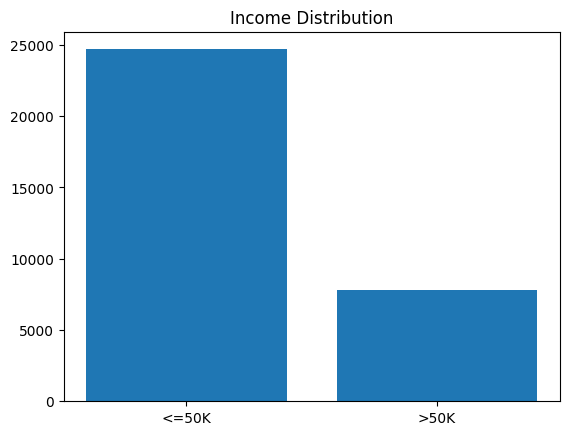

In [9]:
fig, ax = plt.subplots()
ax.bar(income.index, income.values)
ax.set_title("Income Distribution")

## Education vs. Income
This chart compares income levels across different education groups.

While we might expect higher education to correlate with higher income, the plot shows that this relationship isn't always strong. Even among individuals with a Bachelor’s degree or some college education, most still earn less than or equal to $50K.

This suggests that while education likely plays a role, it may not be the most important predictor on its own. Other factors — such as occupation, hours worked per week, or age — might have more direct impact on income levels.

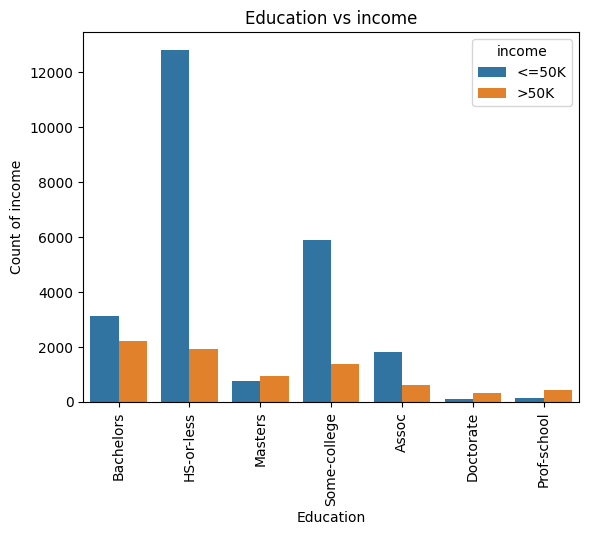

In [10]:

g = sns.countplot(data=df, x='education', hue='income')
# Add a title "Average MPG Over Time"
g.set_title("Education vs income")

# Add x-axis and y-axis labels
g.set(xlabel='Education',
    ylabel='Count of income')
plt.xticks(rotation=90)
plt.show()

## Marital status vs. income
We used a countplot to explore the relationship between marital status and income levels.

This plot shows that married individuals make up the majority of people earning over `$50K`. In contrast, people who are not married or previously married are more likely to earn `$50K` or less.

This suggests that marital status may be a meaningful feature when predicting income.

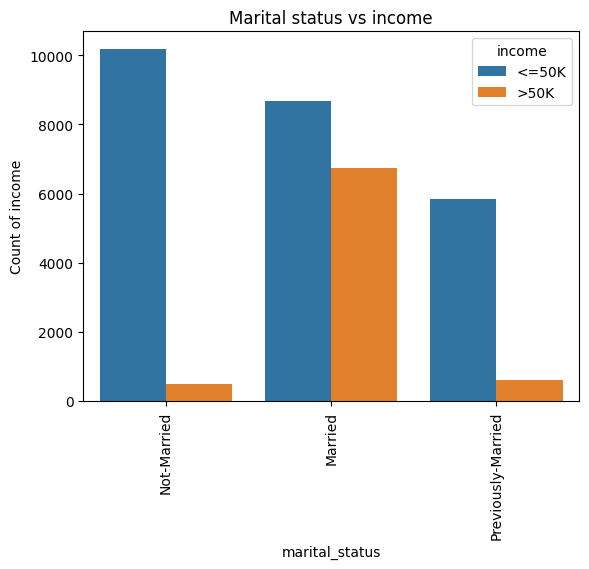

In [11]:
g = sns.countplot(data=df, x='marital_status', hue='income')
# Add a title "Average MPG Over Time"
g.set_title("Marital status vs income")

# Add x-axis and y-axis labels
g.set(xlabel='marital_status',
    ylabel='Count of income')
plt.xticks(rotation=90)
plt.show()

## Workclass vs. income
This chart shows that certain types of work are more strongly associated with higher income.

* ****Private sector**** has the largest count overall, but most individuals in this group earn $50K or less.

* People who are Self-employed or work in the Federal government have a noticeably higher proportion earning more than $50K.

* Without-pay and Other groups (like those we combined earlier) have almost no representation in the >$50K category.

This suggests that workclass is an important predictor of income, but only certain categories (like government and self-employed) show a strong association with higher earnings

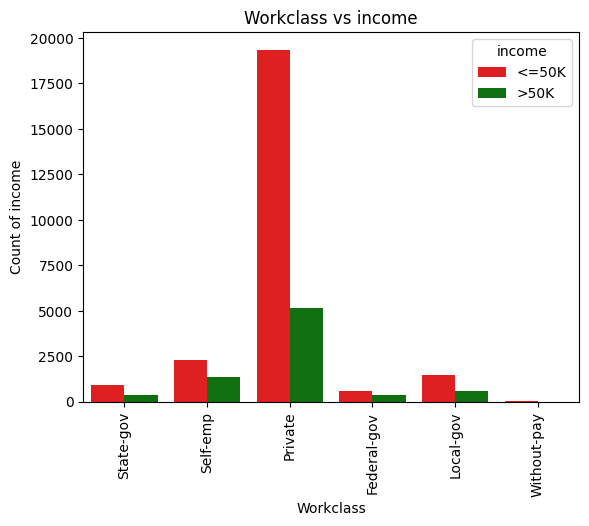

In [12]:
g = sns.countplot(data=df, x='workclass', hue='income',palette={'>50K': 'green', '<=50K': 'red'})
# Add a title "Average MPG Over Time"
g.set_title("Workclass vs income")

# Add x-axis and y-axis labels
g.set(xlabel='Workclass',
    ylabel='Count of income')
plt.xticks(rotation=90)
plt.show()

## Age Category vs Hours Worked per Week by Income
We grouped individuals into age categories and plotted the distribution of hours worked per week across these groups, separated by income level.

This box plot reveals a few things:

* Across most age groups, individuals earning more than $50K tend to work slightly more hours per week on average than those earning less.

* The 18–25 and 65+ age groups generally work fewer hours compared to the core working age ranges (26–64), which is expected.

* There’s a wider spread of hours worked in most groups, especially among lower income individuals, suggesting more variability in work schedules or part-time work.

* While higher income groups show a slight upward shift in hours worked, the overlap in distributions suggests that hours alone don't fully explain income differences — other features likely play a key role.

This feature might be more useful when combined with others (like education or occupation) during modeling.

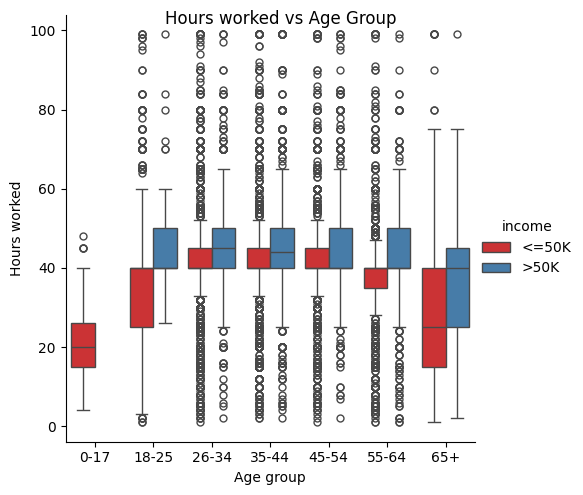

In [13]:
bins = [0,17,25,34,44,54,65,float('inf')]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

ax = sns.catplot(x='age_category', y='hours_per_week', kind='box', hue='income', data=df,palette='Set1')
# Add a title "Average MPG Over Time"
ax.fig.suptitle("Hours worked vs Age Group")

# Add x-axis and y-axis labels
ax.set_axis_labels('Age group','Hours worked')
plt.show()

## Age Category vs Income
This chart shows how income distribution varies across different age groups. While younger individuals (under 25) are mostly in the <=50K income category, we begin to see a gradual increase in higher-income individuals starting around the 35–44 age group. The 45–54 and 55–64 categories have the highest proportion of individuals earning over 50K. After 65, the number of people earning >50K declines sharply, which likely reflects retirement.

Overall, age appears to be positively associated with income up to a certain point, and this relationship may be useful for modeling.

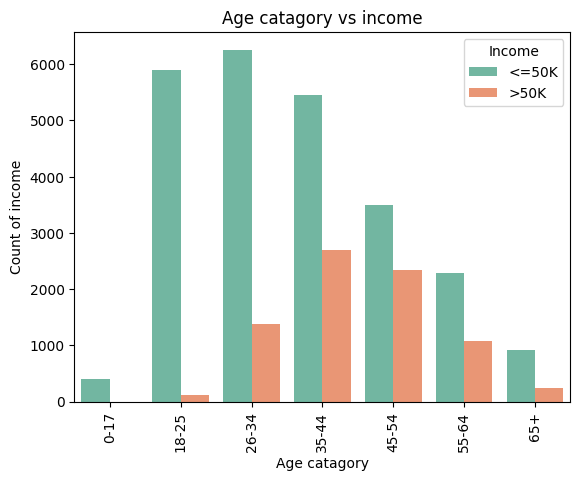

In [14]:

g = sns.countplot(data=df, x='age_category', hue='income', palette='Set2')
# Add a title "Average MPG Over Time"
g.set_title("Age catagory vs income")

# Add x-axis and y-axis labels
g.set(xlabel='Age catagory',
    ylabel='Count of income')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ['<=50K', '>50K'], title='Income')
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis
To explore how numerical features relate to our target variable, we first convert the income column into numeric values. We map <=50K to 0 and >50K to 1 so that we can compute correlations. This allows us to quantify the strength and direction of relationships between each feature and the income level. Sorting the correlation values helps identify which features might be most useful for prediction later in the modeling phase.

In [15]:
income_dict = {'<=50K':0, '>50K':1}
df['income'] = df['income'].map(income_dict)
df.corr(numeric_only=True)['income'].sort_values(ascending=False)

,income
income,1.000000
education_num,0.335272
age,0.234037
hours_per_week,0.229658
capital_gain,0.223336
capital_loss,0.150501
fnlwgt,-0.009502


## Correlation with Income
This horizontal bar chart shows how numerical features in the dataset correlate with the target variable, income. Positive values indicate a direct relationship—higher values of the feature are associated with a greater likelihood of earning more than $50K.

* Education Number, Age, and Hours per Week show the strongest positive correlation with income, suggesting that more years of education, being older, and working more hours are linked to higher earnings.

* Capital Gain and Capital Loss also have positive correlations, though smaller, indicating some influence.

* fnlwgt (final weight) shows almost no correlation and may not be useful as a predictor.

This analysis can help inform feature selection for modeling. Features with stronger correlation to income are more likely to be important predictors.

<ipython-input-16-2492071257>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')


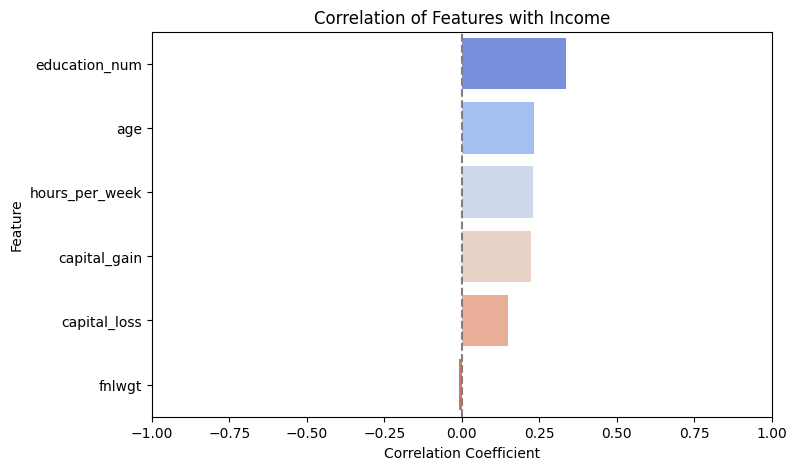

In [16]:
correlation = df.corr(numeric_only=True)['income'].sort_values(ascending=False).drop('income')

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title('Correlation of Features with Income')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# Summary
In this notebook, we explored the relationships between several features and the target variable, income. Through visualizations and correlation analysis, we identified patterns that may influence income classification. Key takeaways include:

* Education level doesn’t always translate to higher income; even those with some college or a bachelor’s degree often fall in the <=50K group.

* Marital status appears to play a strong role, with married individuals more likely to earn >50K.

* Workclass and occupation show imbalances, with some categories more associated with higher income.

* Age and hours per week also show positive correlation with income, especially in mid-career ranges.

* Capital gain/loss and education_num are among the most positively correlated numeric features with income.

* fnlwgt showed no meaningful correlation and will likely be dropped during modeling.

These insights will guide our feature selection and engineering in the next phase of the project.